In [123]:
import warnings
warnings.filterwarnings('ignore')

In [124]:
import pandas as pd

In [125]:
from datatile.summary.df import DataFrameSummary

In [126]:
import numpy as np 

In [127]:
import matplotlib.pyplot as plt

In [128]:
import seaborn as sns

In [129]:
import plotly.express as px

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

In [132]:
from sklearn.pipeline import Pipeline

In [133]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [134]:
from sklearn.svm import SVC

In [135]:
from mlxtend.plotting import plot_confusion_matrix

In [136]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

In [137]:
from sklearn.feature_selection import chi2

In [138]:
from sklearn.feature_selection import SelectKBest

In [139]:
import tensorflow.keras as k

In [140]:
from tensorflow.keras.layers import Conv1D, Dense, Input, MaxPooling1D, Dropout, Flatten

In [141]:
from tensorflow.keras.models import Sequential

In [142]:
from tensorflow.keras.utils import plot_model

In [143]:
from colorama import Fore, Back, Style

In [144]:
from yellowbrick.classifier import ROCAUC

In [145]:
sns.set_style('dark')

In [146]:
df=pd.read_csv('Dataset/Heart-Attack-Dataset.csv')

In [147]:
df.shape

(1319, 9)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [149]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [150]:
df.sample(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1305,47,1,71,117,61,140.0,4.390,1.370,positive
775,85,1,80,129,89,81.0,1.390,0.014,negative
640,58,1,69,148,72,169.0,3.210,1.290,positive
567,70,1,59,107,64,135.0,1.930,0.011,negative
369,78,1,59,113,65,80.0,2.650,0.693,positive
832,83,1,61,117,78,122.0,1.620,0.010,negative
864,49,1,93,105,71,93.0,3.330,0.041,positive
629,73,1,91,91,56,274.0,0.907,0.037,positive
1191,62,0,82,138,93,92.0,2.530,0.019,positive
1089,27,0,93,119,63,137.0,6.740,0.003,positive


In [151]:
df.isna().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [152]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [153]:
df.duplicated().sum()

0

In [154]:
df.describe().T.style.background_gradient(cmap='GnBu')

,count,mean,std,min,25%,50%,75%,max
Age,1319.000000,56.191812,13.647315,14.000000,47.000000,58.000000,65.000000,103.000000
Gender,1319.000000,0.659591,0.474027,0.000000,0.000000,1.000000,1.000000,1.000000
Heart rate,1319.000000,78.336619,51.630270,20.000000,64.000000,74.000000,85.000000,1111.000000
Systolic blood pressure,1319.000000,127.170584,26.122720,42.000000,110.000000,124.000000,143.000000,223.000000
Diastolic blood pressure,1319.000000,72.269143,14.033924,38.000000,62.000000,72.000000,81.000000,154.000000
Blood sugar,1319.000000,146.634344,74.923045,35.000000,98.000000,116.000000,169.500000,541.000000
CK-MB,1319.000000,15.274306,46.327083,0.321000,1.655000,2.850000,5.805000,300.000000
Troponin,1319.000000,0.360942,1.154568,0.001000,0.006000,0.014000,0.085500,10.300000


In [155]:
dfs = DataFrameSummary(df)

In [156]:
dfs.summary()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319,1319,1319,1319,1319,1319,1319,1319,NaN
mean,56.1918,0.659591,78.3366,127.171,72.2691,146.634,15.2743,0.360942,NaN
std,13.6473,0.474027,51.6303,26.1227,14.0339,74.923,46.3271,1.15457,NaN
min,14,0,20,42,38,35,0.321,0.001,NaN
25%,47,0,64,110,62,98,1.655,0.006,NaN
50%,58,1,74,124,72,116,2.85,0.014,NaN
75%,65,1,85,143,81,169.5,5.805,0.0855,NaN
max,103,1,1111,223,154,541,300,10.3,NaN
counts,1319,1319,1319,1319,1319,1319,1319,1319,1319
uniques,75,2,79,116,73,244,700,352,2


In [157]:
numeric_types  = df.select_dtypes(include=['float64', 'int64'])

In [158]:
numeric_types

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006
1315,66,1,84,125,55,149.0,1.33,0.172
1316,45,1,85,168,104,96.0,1.24,4.250
1317,54,1,58,117,68,443.0,5.80,0.359


In [159]:
type(numeric_types)

pandas.core.frame.DataFrame

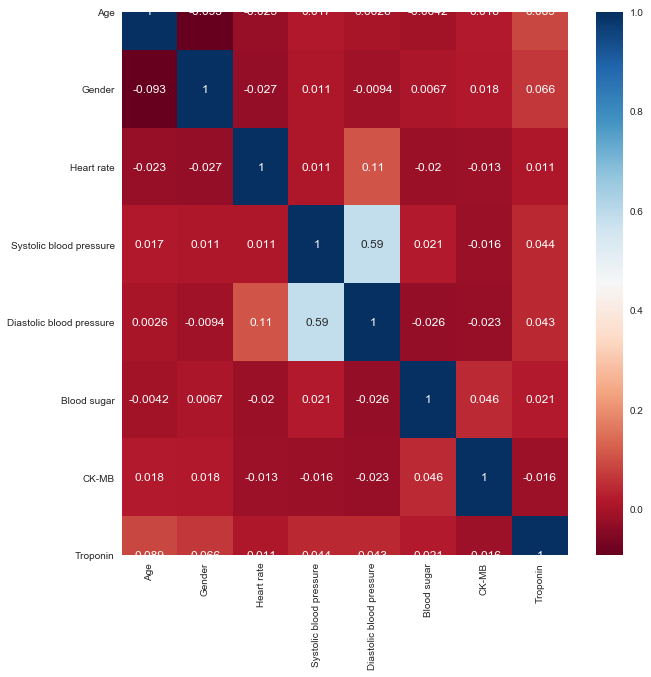

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="RdBu", annot=True)

In [161]:
titles = numeric_types.columns

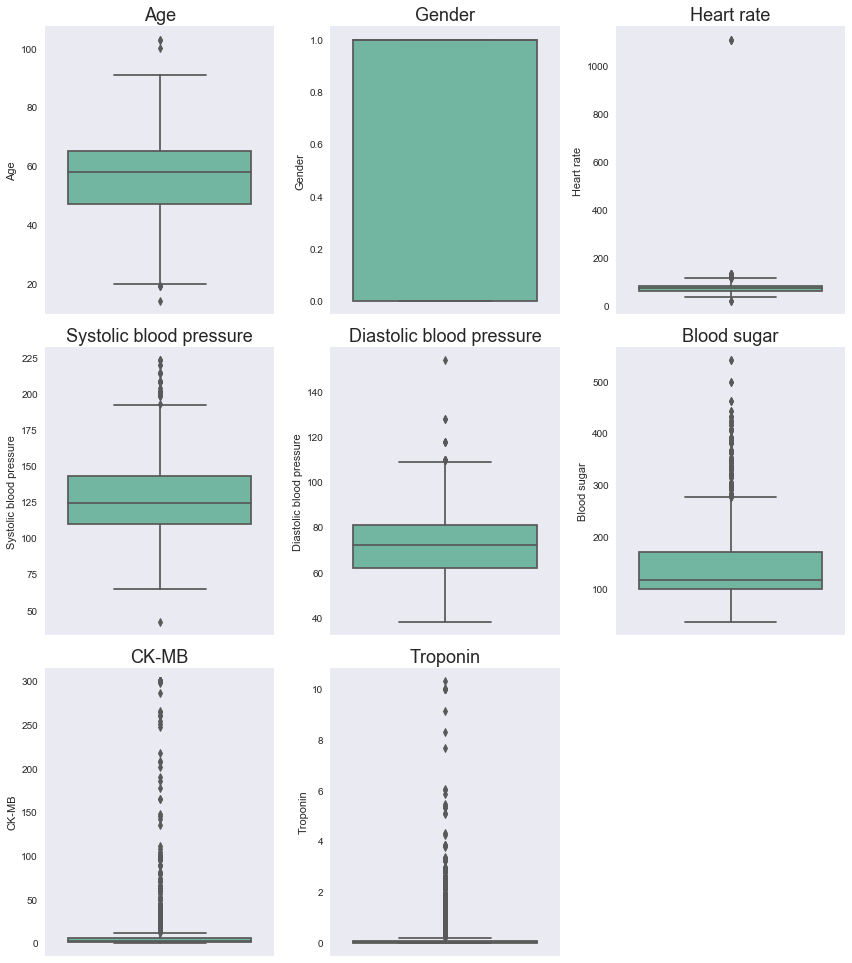

In [162]:
plt.figure(figsize=(12,18))
for i, variable in enumerate(numeric_types):
    plt.subplot(4,3,i+1)
    sns.set_palette('Set2')
    sns.boxplot(x=df[variable],data=df,orient="v")
    sns.despine(top=True,right=True,left=True)
    plt.tight_layout()
    plt.title(titles[i],size = 18)

In [163]:
result_vc = df["Result"].value_counts()

In [164]:
px.bar(result_vc, x=result_vc.index, y = result_vc.values, 
           color=result_vc.index, title="Train Dataset Result Wise Count",
          labels={'y': "Results Count", 'index': "Result"}, color_discrete_sequence=px.colors.qualitative.G10)

In [165]:
le=LabelEncoder()
df["Result"] = le.fit_transform(df["Result"])

In [166]:
class_names = ["Positive", "Negative"]

In [167]:
y = df.loc[:,'Result'].values
X = df.drop(['Result'], axis = 1)

In [168]:
best=SelectKBest(score_func=chi2, k=6)
fit=best.fit(X,y)

In [169]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [170]:
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']

In [171]:
scores.sort_values(by=["Score"], ascending=False)

,Feature,Score
6,CK-MB,8778.481659
7,Troponin,256.102264
0,Age,247.653485
5,Blood sugar,55.144417
1,Gender,4.003940
3,Systolic blood pressure,3.067159
2,Heart rate,2.147992
4,Diastolic blood pressure,0.335111


In [172]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1,shuffle=True)

In [173]:
train_x

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
710,55,0,59,110,65,208.0,2.53,0.024
1258,33,1,62,76,55,106.0,0.71,0.007
435,65,1,70,142,75,108.0,165.00,0.058
987,52,1,60,117,68,110.0,1.04,0.810
1286,35,1,74,134,58,78.0,1.37,0.003
...,...,...,...,...,...,...,...,...
715,60,0,58,120,69,115.0,8.80,0.021
905,60,1,100,117,57,111.0,1.90,0.006
1096,30,1,60,202,88,197.0,12.89,0.003
235,60,1,53,102,61,303.0,14.07,0.816


In [174]:
print(f"Shape of Train Records : {np.shape(train_x)}")
print(f"Shape of Test Records : {np.shape(test_x)}")
print(f"Shape of Train Records : {np.shape(train_y)}")
print(f"Shape of Test Records : {np.shape(test_y)}")

Shape of Train Records : (1055, 8)
Shape of Test Records : (264, 8)
Shape of Train Records : (1055,)
Shape of Test Records : (264,)


In [175]:
def visualize_outcomes(score):
    
    names = ['SVM', 'Random Forest', 'Bagging', 'Extra Tree', 'AdaBoost', 'Gradient Boosting']

    plt.rcParams['figure.figsize']=20,8
    ax = sns.barplot(x=names, y=score, palette = "plasma", saturation =2.0)
    plt.xlabel('Model', fontsize = 20 )
    plt.ylabel('Accuracy(%)', fontsize = 20)
    plt.title('Model Comparison - Test set', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

In [176]:
def p_cm(cm_model):
    plot_confusion_matrix(cm_model, cmap = "viridis_r")
    plt.show()

In [177]:
def model_creation_training_prediction(X_train, y_train, X_test, y_test):
    
    models= [[' SVM ',SVC()],
             [' Random Forest ', RandomForestClassifier()],
             [' Bagging ', BaggingClassifier()],
             [' Extra Tree ', ExtraTreesClassifier()],
             [' AdaBoost ', AdaBoostClassifier()],
             [' Gradient Boosting ', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)]]

    scores = []
    
    for model_name, model in models:

        model = model
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        cm_model = confusion_matrix(y_test, pred)
        scores.append(accuracy_score(y_test, model.predict(X_test)))
        

        print(Back.YELLOW + Fore.BLACK + Style.BRIGHT + model_name)
        print(Back.RESET)
        p_cm(cm_model)
        print('\n' + Fore.BLUE + 'Training Acc.  : ' + Fore.GREEN + str(round(accuracy_score(y_train, model.predict(X_train)) * 100, 2)) + '%' )
        print(Fore.BLUE + 'Validation Acc.: ' + Fore.GREEN + str(round(accuracy_score(y_test, model.predict(X_test)) * 100, 2)) + '%' )
        print(Fore.CYAN + classification_report(y_test, pred)) 
        
        visualizer = ROCAUC(model,binary=True)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.show()   

        print('\n' + Fore.BLACK + Back.WHITE + '⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜\n')
    
        
    return scores

 SVM 



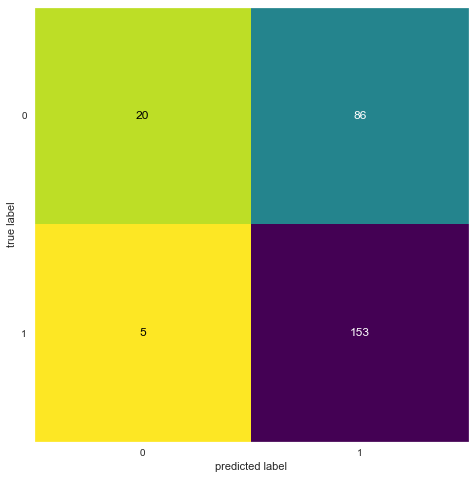


Training Acc.  : 66.92%
Validation Acc.: 65.53%
              precision    recall  f1-score   support

           0       0.80      0.19      0.31       106
           1       0.64      0.97      0.77       158

    accuracy                           0.66       264
   macro avg       0.72      0.58      0.54       264
weighted avg       0.70      0.66      0.58       264



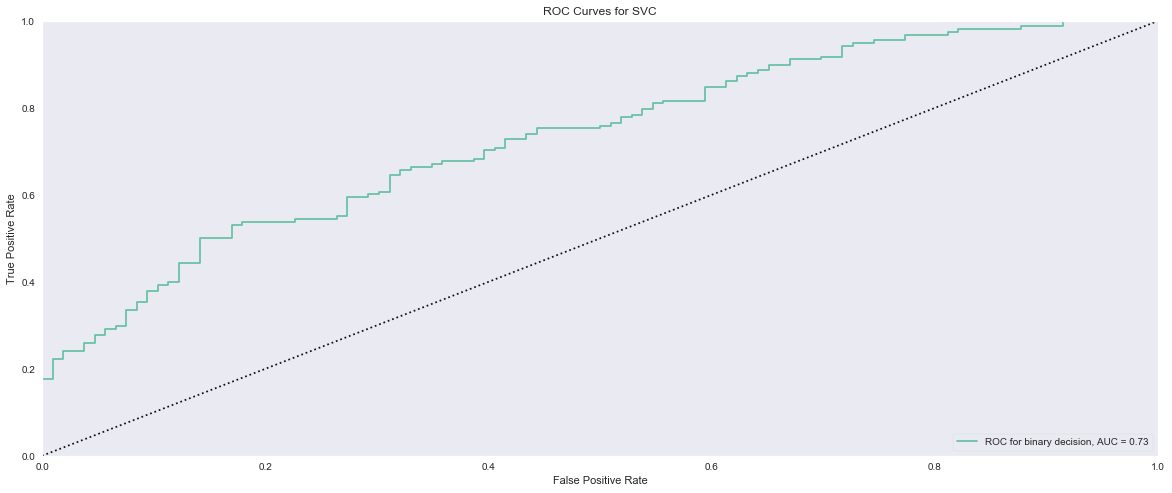


⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

 Random Forest 



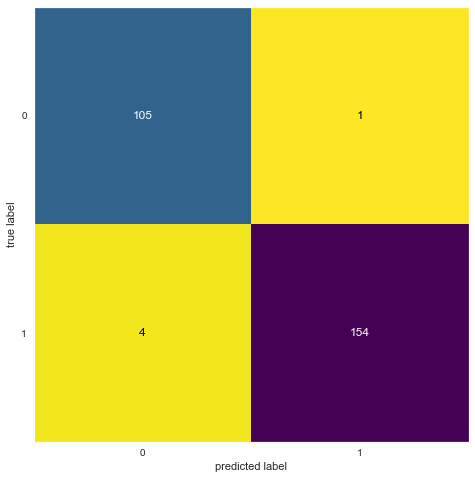


Training Acc.  : 100.0%
Validation Acc.: 98.11%
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       106
           1       0.99      0.97      0.98       158

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



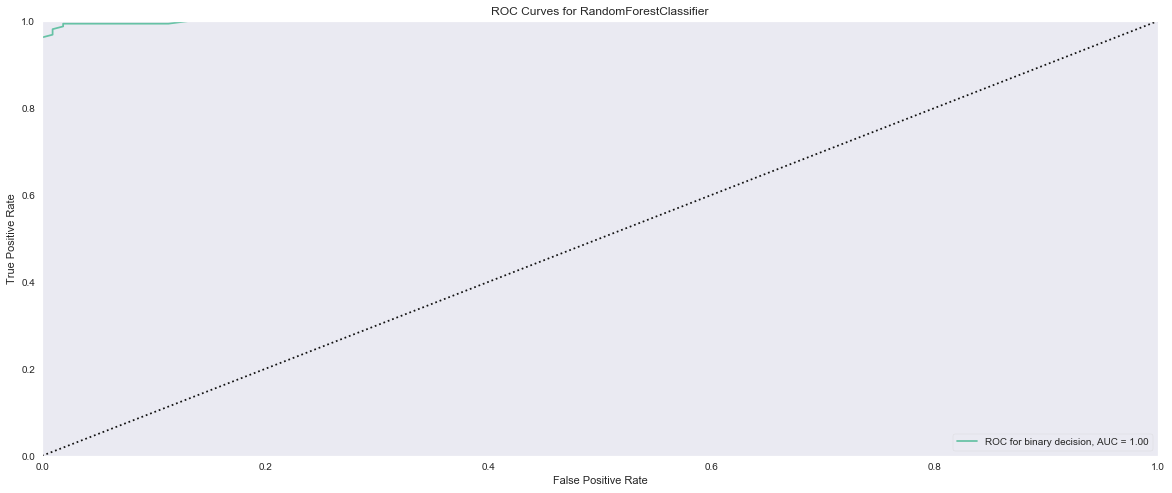


⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

 Bagging 



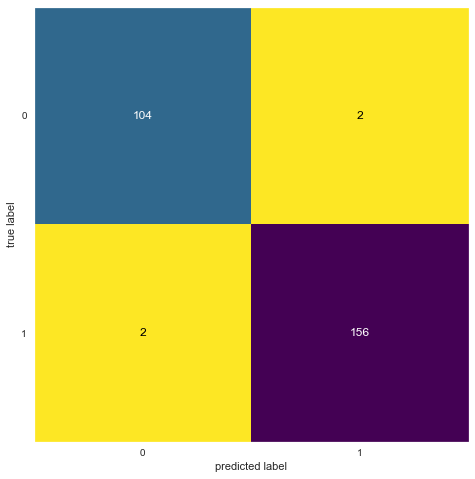


Training Acc.  : 99.72%
Validation Acc.: 98.48%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       106
           1       0.99      0.99      0.99       158

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



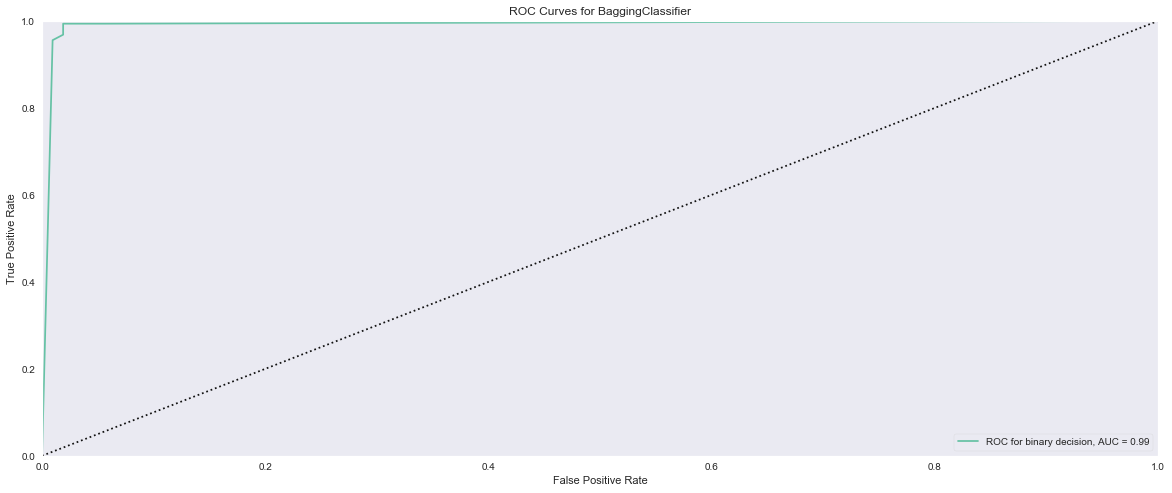


⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

 Extra Tree 



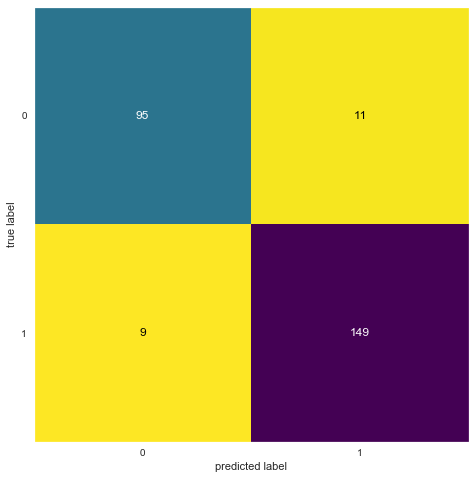


Training Acc.  : 100.0%
Validation Acc.: 92.42%
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       106
           1       0.93      0.94      0.94       158

    accuracy                           0.92       264
   macro avg       0.92      0.92      0.92       264
weighted avg       0.92      0.92      0.92       264



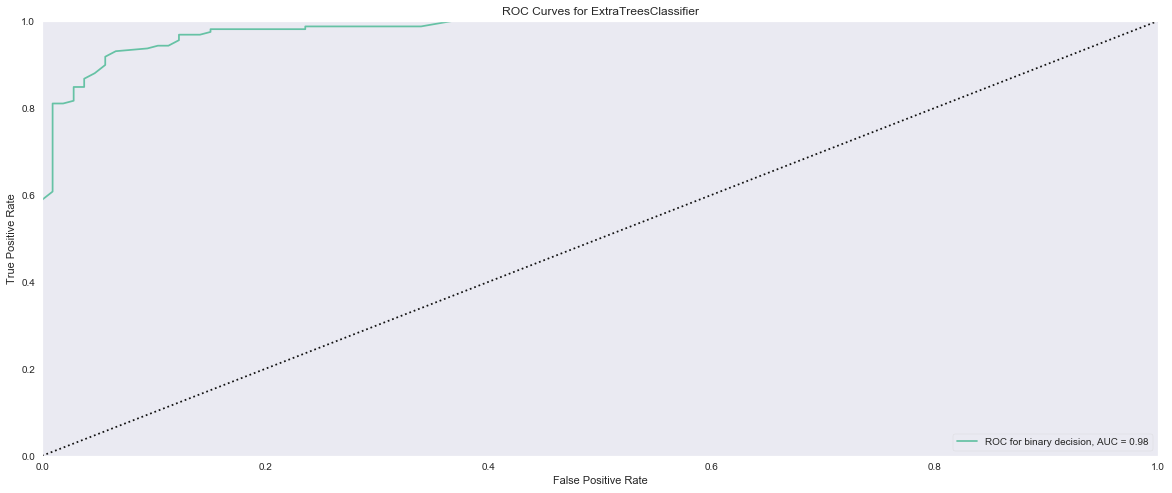


⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

 AdaBoost 



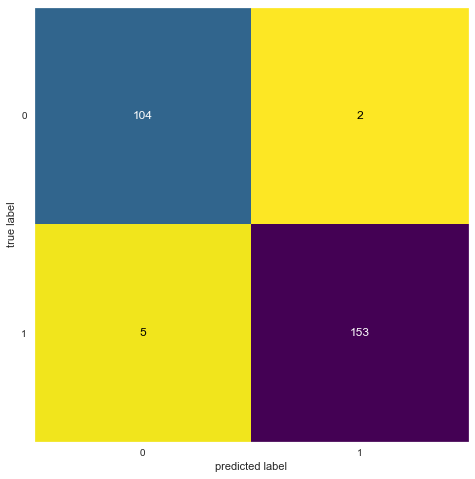


Training Acc.  : 99.91%
Validation Acc.: 97.35%
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       106
           1       0.99      0.97      0.98       158

    accuracy                           0.97       264
   macro avg       0.97      0.97      0.97       264
weighted avg       0.97      0.97      0.97       264



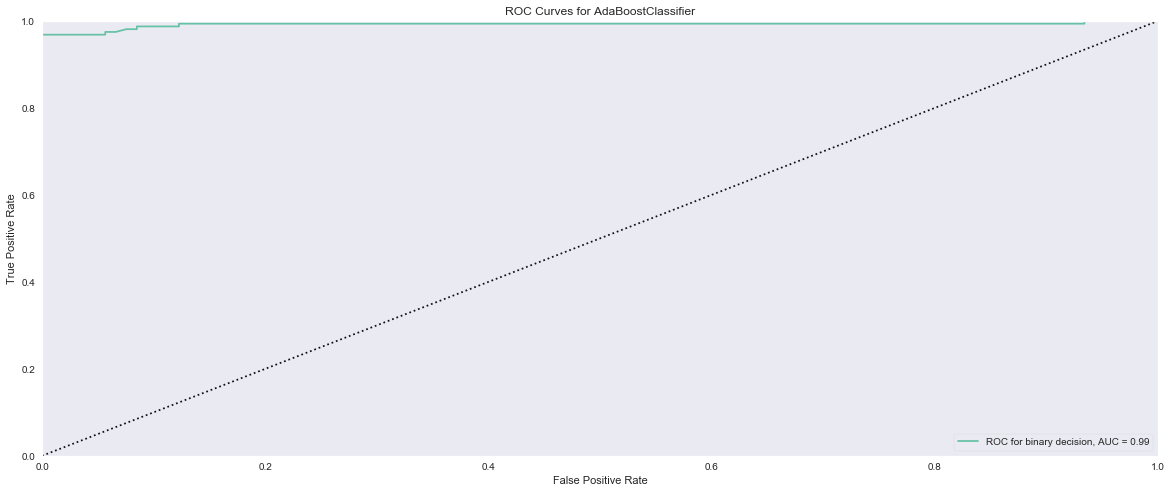


⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

 Gradient Boosting 



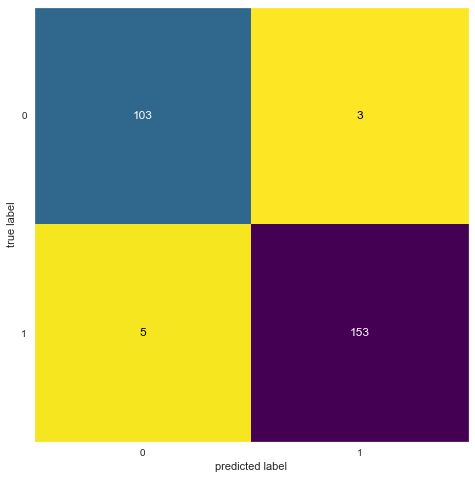


Training Acc.  : 98.96%
Validation Acc.: 96.97%
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       106
           1       0.98      0.97      0.97       158

    accuracy                           0.97       264
   macro avg       0.97      0.97      0.97       264
weighted avg       0.97      0.97      0.97       264



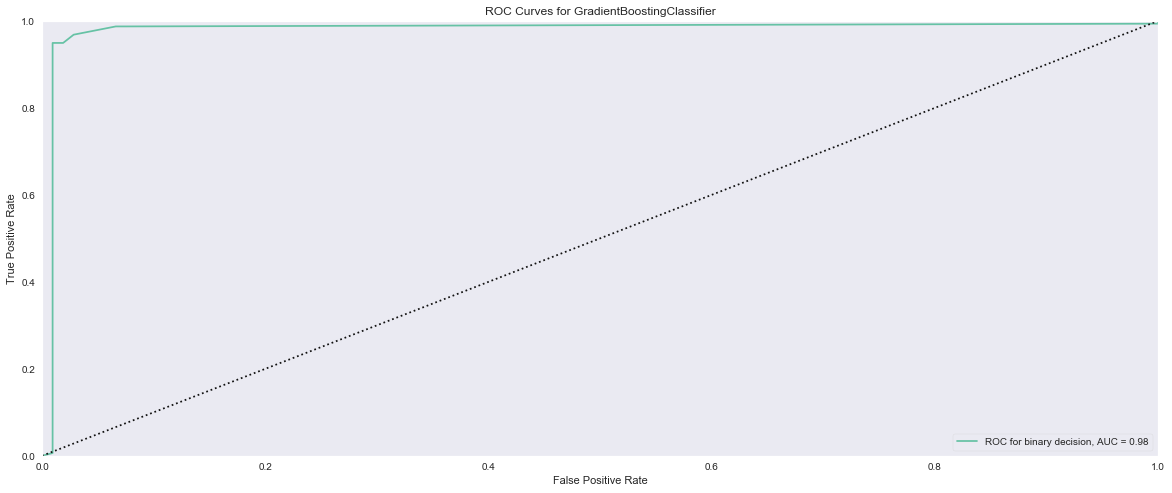


⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜



In [178]:
evaluation_scores = model_creation_training_prediction(train_x, train_y, test_x, test_y)

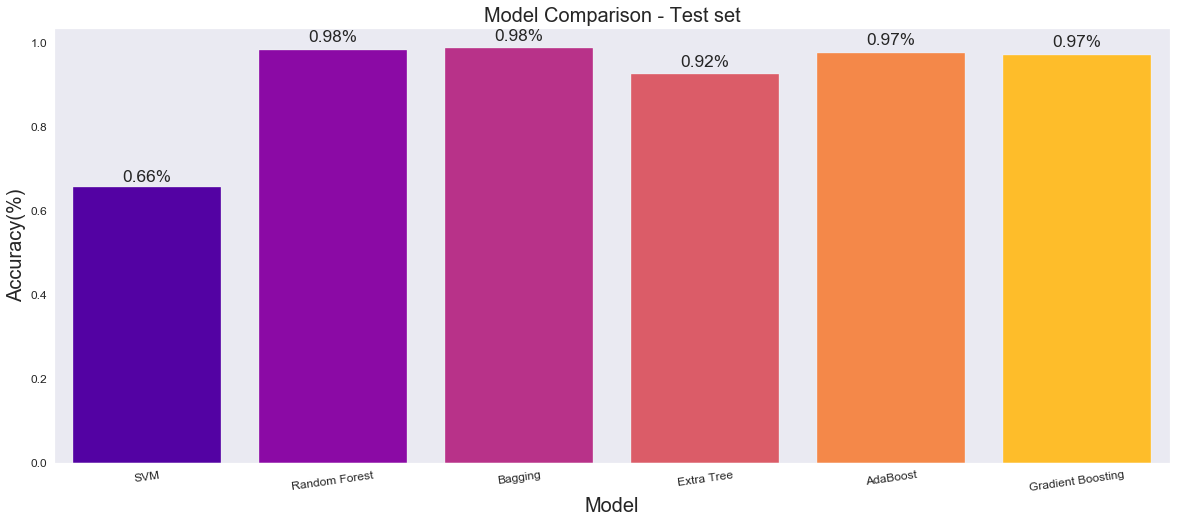

In [179]:
visualize_outcomes(evaluation_scores)

In [180]:
def create_optimized_generalized_metric_learning():
    model_mlp = Sequential()

    model_mlp.add(Dense(128, input_dim=8, activation="relu"))
    model_mlp.add(Dense(64, activation='relu'))
    model_mlp.add(Dense(32, activation='relu'))
    model_mlp.add(Dense(1, activation='sigmoid'))
    return model_mlp

In [181]:
model_ogml = create_optimized_generalized_metric_learning()

In [182]:
model_ogml.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [183]:
plot_model(model_ogml, to_file='convnet.png', show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [184]:
model_ogml.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [185]:
history_mlp = model_ogml.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)

Epoch 1/200
33/33 [==============================] - 1s 6ms/step - loss: 0.7805 - accuracy: 0.6133 - val_loss: 0.6630 - val_accuracy: 0.6174
Epoch 2/200
33/33 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.6408 - val_loss: 0.5639 - val_accuracy: 0.6894
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6578 - val_loss: 0.5608 - val_accuracy: 0.6856
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6616 - val_loss: 0.5470 - val_accuracy: 0.6932
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.6900 - val_loss: 0.7012 - val_accuracy: 0.6136
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.6682 - val_loss: 0.5297 - val_accuracy: 0.7121
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7024 - val_loss: 0.5389 - val_accuracy: 0.6932
Epoch 8/200
3

Epoch 59/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.7649 - val_loss: 0.4562 - val_accuracy: 0.7538
Epoch 60/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.7763 - val_loss: 0.5457 - val_accuracy: 0.7083
Epoch 61/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.7754 - val_loss: 0.4794 - val_accuracy: 0.7348
Epoch 62/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.7915 - val_loss: 0.5249 - val_accuracy: 0.7311
Epoch 63/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8009 - val_loss: 0.4963 - val_accuracy: 0.7538
Epoch 64/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.7735 - val_loss: 0.4675 - val_accuracy: 0.7538
Epoch 65/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4901 - accuracy: 0.7526 - val_loss: 0.6873 - val_accuracy: 0.6477
Epoch 

33/33 [==============================] - 0s 3ms/step - loss: 0.3676 - accuracy: 0.8190 - val_loss: 0.4795 - val_accuracy: 0.7765
Epoch 117/200
33/33 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8246 - val_loss: 0.4500 - val_accuracy: 0.7879
Epoch 118/200
33/33 [==============================] - 0s 3ms/step - loss: 0.3724 - accuracy: 0.8019 - val_loss: 0.4387 - val_accuracy: 0.7689
Epoch 119/200
33/33 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.8341 - val_loss: 0.4686 - val_accuracy: 0.7500
Epoch 120/200
33/33 [==============================] - 0s 3ms/step - loss: 0.3365 - accuracy: 0.8417 - val_loss: 0.4646 - val_accuracy: 0.7538
Epoch 121/200
33/33 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.8246 - val_loss: 0.5802 - val_accuracy: 0.7159
Epoch 122/200
33/33 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8066 - val_loss: 0.4815 - val_accuracy: 0.7576
Epoch 123/200

33/33 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8483 - val_loss: 0.5506 - val_accuracy: 0.7500
Epoch 174/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2762 - accuracy: 0.8749 - val_loss: 0.6538 - val_accuracy: 0.7841
Epoch 175/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8559 - val_loss: 0.5540 - val_accuracy: 0.7689
Epoch 176/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2809 - accuracy: 0.8607 - val_loss: 0.4984 - val_accuracy: 0.7879
Epoch 177/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2910 - accuracy: 0.8550 - val_loss: 0.5191 - val_accuracy: 0.7992
Epoch 178/200
33/33 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8521 - val_loss: 0.5458 - val_accuracy: 0.7500
Epoch 179/200
33/33 [==============================] - 0s 3ms/step - loss: 0.3050 - accuracy: 0.8550 - val_loss: 0.4979 - val_accuracy: 0.7803
Epoch 180/200

In [186]:
ss = StandardScaler()

In [187]:
train_x = ss.fit_transform(train_x)

In [188]:
test_x = ss.fit_transform(test_x)

In [189]:
history_mlp = model_ogml.fit(train_x, train_y, validation_split=0.2, epochs=200)

Epoch 1/200
27/27 [==============================] - 0s 9ms/step - loss: 0.8243 - accuracy: 0.6007 - val_loss: 0.5531 - val_accuracy: 0.6730
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.7121 - val_loss: 0.5158 - val_accuracy: 0.6967
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5696 - accuracy: 0.7571 - val_loss: 0.4826 - val_accuracy: 0.7583
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7820 - val_loss: 0.5240 - val_accuracy: 0.6777
Epoch 5/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.7773 - val_loss: 0.4623 - val_accuracy: 0.7393
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.7915 - val_loss: 0.4658 - val_accuracy: 0.7678
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8282 - val_loss: 0.4634 - val_accuracy: 0.7583
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.9502 - val_loss: 0.4274 - val_accuracy: 0.8910
Epoch 60/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1474 - accuracy: 0.9443 - val_loss: 0.4569 - val_accuracy: 0.8720
Epoch 61/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9562 - val_loss: 0.5702 - val_accuracy: 0.8246
Epoch 62/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9455 - val_loss: 0.4999 - val_accuracy: 0.8626
Epoch 63/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1317 - accuracy: 0.9455 - val_loss: 0.4944 - val_accuracy: 0.8483
Epoch 64/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1256 - accuracy: 0.9526 - val_loss: 0.4604 - val_accuracy: 0.8673
Epoch 65/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.9514 - val_loss: 0.5138 - val_accuracy: 0.8483
Epoch 

27/27 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9834 - val_loss: 0.6222 - val_accuracy: 0.8626
Epoch 117/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9716 - val_loss: 0.6378 - val_accuracy: 0.8578
Epoch 118/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0833 - accuracy: 0.9739 - val_loss: 0.6143 - val_accuracy: 0.8626
Epoch 119/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9870 - val_loss: 0.5962 - val_accuracy: 0.8720
Epoch 120/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0638 - accuracy: 0.9822 - val_loss: 0.5615 - val_accuracy: 0.8957
Epoch 121/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9810 - val_loss: 0.5517 - val_accuracy: 0.9100
Epoch 122/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9656 - val_loss: 0.6351 - val_accuracy: 0.8626
Epoch 123/200

27/27 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 0.7194 - val_accuracy: 0.8768
Epoch 174/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9882 - val_loss: 0.6995 - val_accuracy: 0.8957
Epoch 175/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9858 - val_loss: 0.6762 - val_accuracy: 0.9052
Epoch 176/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9775 - val_loss: 0.7280 - val_accuracy: 0.8863
Epoch 177/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9834 - val_loss: 0.7588 - val_accuracy: 0.8863
Epoch 178/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.7698 - val_accuracy: 0.8815
Epoch 179/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9858 - val_loss: 0.7217 - val_accuracy: 0.8957
Epoch 180/200

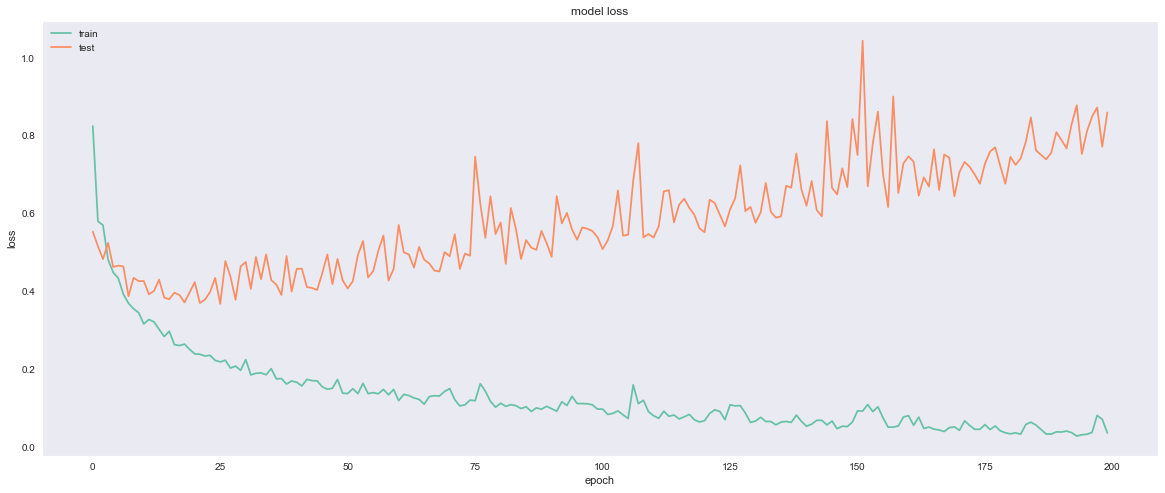

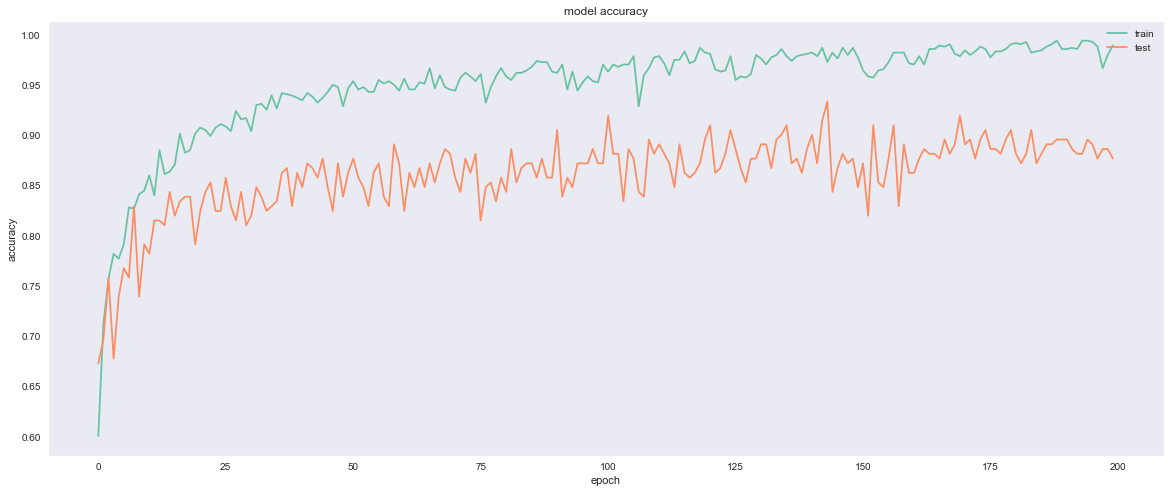

In [190]:
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [191]:
y_pred = model_ogml.predict(test_x)

9/9 [==============================] - 0s 2ms/step


In [192]:
y_pred = [1 if y>=0.5 else 0 for y in y_pred]

In [193]:
scores = model_ogml.evaluate(test_x, test_y)

9/9 [==============================] - 0s 2ms/step - loss: 2.5290 - accuracy: 0.7576


In [194]:
cm_model = confusion_matrix(test_y, y_pred)

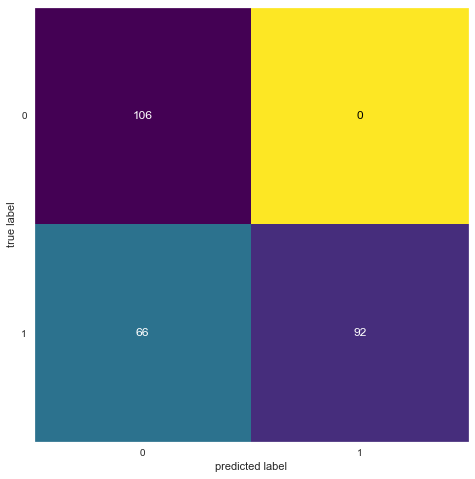

In [131]:
p_cm(cm_model)